c:\Users\duppu\miniconda3\envs\ScientificComputing\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\duppu\miniconda3\envs\ScientificComputing\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


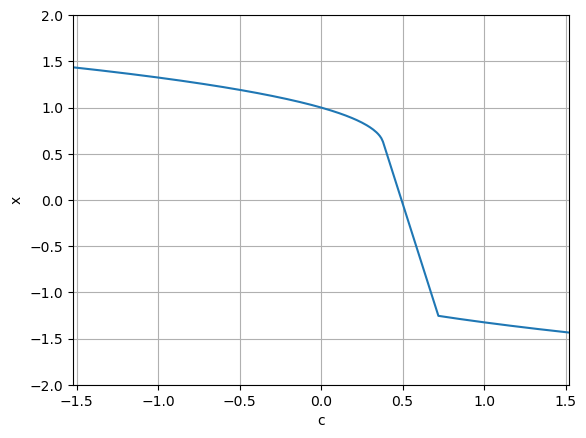

In [73]:
"""
For each of the exercises, consider in turn the following problem.

The algebraic cubic equation
\begin{equation}
    x^3 - x + c = 0
\end{equation}

In this case a discretisation (shooting or collocation) is not needed (in the interface above 
you might have an option discretisation=lambda x: x, i.e., the equations are just passed 
straight through to the solver and shooting is not used. Vary c between -2 and 2.

Write a code that performs natural parameter continuation, i.e., it simply increments the 
a parameter by a set amount and attempts to find the solution for the new parameter value 
using the last found solution as an initial guess.
"""
from scipy.optimize import fsolve
import numpy as np

c0 = -2
cf = 2
dc = 0.01

c_solutions = []
solutions = []

u0 = 1

while c0 <= cf:

    def func(x):
        return x**3 - x + c0

    sol = fsolve(func, u0)
    
    if np.isclose(func(sol), 0):
        c_solutions.append(c0)
        solutions.append(sol)
        u0 = sol
    
    c0 += dc
    

# Plot the solutions
import matplotlib.pyplot as plt
plt.plot(c_solutions, solutions)
plt.xlabel('c')
plt.ylabel('x')
plt.ylim(-2, 2)
plt.xlim(-max(np.abs(solutions)), max(np.abs(solutions)))
plt.grid()
plt.show()


In [46]:
fun = lambda t, x, c: x**3 - x + c

c0 = [-2]
fun_a = lambda t, x: fun(t, x, *c0)

print(fun(0, 1, c0[0]), fun_a(0, 1))

-2 -2


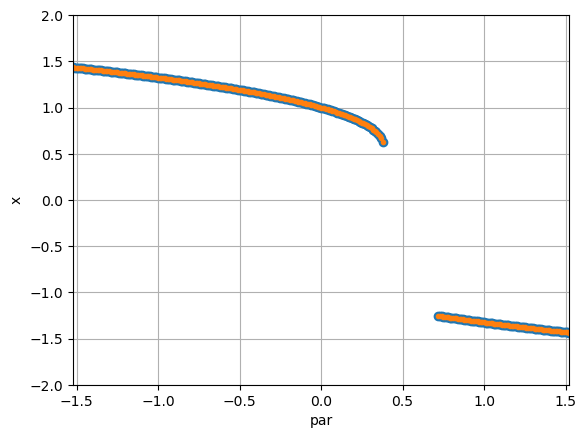

In [87]:
def continuation(ode, x0, par0, vary_par, step_size, max_steps):
    """
    Performs natural parameter continuation on the given ODE.
    """        
    x = x0
    x_sol = []
    par_sol = []

    for _ in range(max_steps):
        def func(x):
            return x**3 - x + par0[vary_par]    
        
        fs = fsolve(func, x, full_output=True)
        sol = fs[0]
        converged = fs[2] == 1
        if converged:
            x_sol.append(sol)
            par_sol.append(par0[vary_par])
            x = sol

        par0[vary_par] += step_size

    return x_sol, par_sol

ode = lambda t, x, c: x**3 - x + c
x0 = 1
par0 = [-2]
vary_par = 0
step_size = 0.01
max_steps = 1000

x, par = continuation(ode, x0, par0, vary_par, step_size, max_steps)

import matplotlib.pyplot as plt
plt.plot(c_solutions, solutions, 'o', label='scipy.optimize.fsolve')
plt.plot(par, x, '.')

plt.xlabel('par')
plt.ylabel('x')
plt.xlim(-max(np.abs(solutions)), max(np.abs(solutions)))
plt.ylim(-2, 2)
plt.grid()
plt.show()

In [85]:
def func(x):
    return x**3 - x + 0.5

fs = fsolve(func, 0, full_output=True)
fs[2]


5